In [222]:
import numpy as np
import pandas as pd
from Levenshtein import distance as lev_distance
import matplotlib.pyplot as plt

# Import des données

In [64]:
data_path = "C:\\Users\\Matthieu\\Desktop\\LangMap\\Data\\"

In [65]:
data = pd.read_excel(data_path + 'sampledata.xlsx')

In [66]:
data.head()

,index,anglais,francais,allemand,italien,espagnol,néerlandais,espéranto,suédois,latin,breton,finnois
0,I,I,je,ich,io,yo,ik,mi,jag,ego,me,minä
1,you sg.,"you, thou","tu, vous","du, Sie",tu,"tú, usted","jij, je",vi,du,tu,te,sinä
2,he,he,il,er,"lui, egli",él,hij,li,han,"is, ea",eñ,hän
3,we,we,nous,wir,noi,nosotros,"wij, we",ni,vi,nos,ni,me
4,you pl.,you,vous,"ihr, Sie",voi,"vosotros, ustedes",jullie,vi,ni,vos,c'hwi,te


# Nettoyage des donnees

## Retrait des accents et majuscules

In [67]:
for col in data.columns:
    data[col] = data[col].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.lower()

In [68]:
data = data.set_index('index')

In [69]:
data.head()

,anglais,francais,allemand,italien,espagnol,néerlandais,espéranto,suédois,latin,breton,finnois
index,,,,,,,,,,,
i,i,je,ich,io,yo,ik,mi,jag,ego,me,mina
you sg.,"you, thou","tu, vous","du, sie",tu,"tu, usted","jij, je",vi,du,tu,te,sina
he,he,il,er,"lui, egli",el,hij,li,han,"is, ea",en,han
we,we,nous,wir,noi,nosotros,"wij, we",ni,vi,nos,ni,me
you pl.,you,vous,"ihr, sie",voi,"vosotros, ustedes",jullie,vi,ni,vos,c'hwi,te


## Parsing des traductions multiples

In [70]:
for col in data.columns:
    data[col] = data[col].str.replace(',', '')
    data[col] = data[col].apply(lambda x: x.split())

In [71]:
data.head()

,anglais,francais,allemand,italien,espagnol,néerlandais,espéranto,suédois,latin,breton,finnois
index,,,,,,,,,,,
i,[i],[je],[ich],[io],[yo],[ik],[mi],[jag],[ego],[me],[mina]
you sg.,"[you, thou]","[tu, vous]","[du, sie]",[tu],"[tu, usted]","[jij, je]",[vi],[du],[tu],[te],[sina]
he,[he],[il],[er],"[lui, egli]",[el],[hij],[li],[han],"[is, ea]",[en],[han]
we,[we],[nous],[wir],[noi],[nosotros],"[wij, we]",[ni],[vi],[nos],[ni],[me]
you pl.,[you],[vous],"[ihr, sie]",[voi],"[vosotros, ustedes]",[jullie],[vi],[ni],[vos],[c'hwi],[te]


# Distances de Levenshtein

## Distance de Levenshtein normalisée

In [166]:
def normLevenshtein(word1, word2):
    return(lev_distance(word1, word2)/max(len(word1), len(word2)))

## Distance de Levenshtein normalisée entre deux listes

In [167]:
def listLevenshtein(list1, list2):
    out = 1
    for w1 in list1:
        for w2 in list2:
            if normLevenshtein(w1, w2) < out:
                out = normLevenshtein(w1, w2)
    return(out)    

## Distance de Levenshtein normalisée entre deux séries

In [168]:
def SerieLevenshtein(s1, s2):
    df = pd.concat([s1, s2], axis=1)
    return(np.mean(df.apply(lambda row: listLevenshtein(row[s1.name], row[s2.name]), axis=1)))

## Matrice des distances de Levenshtein généralisées

In [193]:
Distances = np.zeros((len(data.columns), len(data.columns)))

In [194]:
for l1 in range(0, len(data.columns)):
    col1 = data.columns[l1]
    for l2 in range(l1 + 1, len(data.columns)):
        col2 = data.columns[l2]
        Distances[l1][l2] = SerieLevenshtein(data[col1], data[col2])

In [197]:
Distances = Distances + Distances.T - np.diag(Distances.diagonal())

In [200]:
Distances_df = pd.DataFrame(Distances)

In [201]:
Distances_df.columns = data.columns

In [202]:
Distances_df.index = data.columns

In [203]:
Distances_df

,anglais,francais,allemand,italien,espagnol,néerlandais,espéranto,suédois,latin,breton,finnois
anglais,0.000000,0.799877,0.662580,0.810867,0.823257,0.635448,0.797167,0.669128,0.815064,0.853519,0.873382
francais,0.799877,0.000000,0.817023,0.562318,0.595715,0.812035,0.633471,0.848800,0.618451,0.835568,0.886420
allemand,0.662580,0.817023,0.000000,0.812465,0.836575,0.435268,0.804840,0.619852,0.806046,0.822360,0.878876
italien,0.810867,0.562318,0.812465,0.000000,0.461204,0.831522,0.624326,0.823416,0.508077,0.835102,0.877434
espagnol,0.823257,0.595715,0.836575,0.461204,0.000000,0.835168,0.669285,0.832348,0.599047,0.820332,0.865120
néerlandais,0.635448,0.812035,0.435268,0.831522,0.835168,0.000000,0.810037,0.627031,0.823631,0.813677,0.891333
espéranto,0.797167,0.633471,0.804840,0.624326,0.669285,0.810037,0.000000,0.815662,0.651608,0.824885,0.853872
suédois,0.669128,0.848800,0.619852,0.823416,0.832348,0.627031,0.815662,0.000000,0.824122,0.844001,0.815990
latin,0.815064,0.618451,0.806046,0.508077,0.599047,0.823631,0.651608,0.824122,0.000000,0.829482,0.881426
breton,0.853519,0.835568,0.822360,0.835102,0.820332,0.813677,0.824885,0.844001,0.829482,0.000000,0.872331


# Clustering

## MDS

In [212]:
from sklearn.manifold import MDS

In [216]:
embedding = MDS(dissimilarity='precomputed')

In [219]:
LangSpace = embedding.fit_transform(Distances_df)

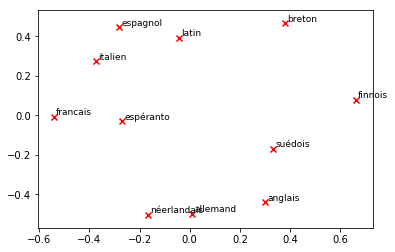

In [242]:
types = data.columns.values
x_coords = LangSpace[:, 0]
y_coords = LangSpace[: ,1]
 
for i,type in enumerate(types):
    x = x_coords[i]
    y = y_coords[i]
    plt.scatter(x, y, marker='x', color='red')
    decalage = 0.01
    plt.text(x + decalage, y + decalage, type, fontsize=9)
plt.show()